<a href="https://colab.research.google.com/github/kaytlyn724/MAT422/blob/main/HW2.2_Probability_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.2 Probability Distribution**

---

### **Key Concepts:**

*   2.2.1. Probability axioms
*   2.2.2. Conditional probability
*   2.2.3. Discrete random variables
*   2.2.4. Continuous random variables

In [1]:
### important imports to run code ###

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#import sympy
#from numpy.linalg import qr
#from sklearn.linear_model import LinearRegression

## **2.2.1. Probability Axioms**

**Sample Spaces and Events:** The sample space of an experiment, denoted by S, is the set of all possible outcomes of that experiment.

In probability, we will be interested not only in the individual outcomes of S but also in various collections of outcomes from S. In fact, it is often more meaningful to study collection of outcomes.

An event is any collection (subset) of outcomes contained in the sample space S. An event is simple if it consists of exactly one outcome and compound if it consists of more than one outcome.

Given an experiment and a sample space S, the probability
distribution is a function which assign to each event A a number P(A), called
the probability of the event A, which will give a precise measure of the chance
that A will occur. The probability assignments should satisfy the following
axioms (basic properties) of probability.

For any event $A, 1 ≥ P(A) ≥ 0$

$P(S) = 1$

If $A_1, A_2, A_3, . . .$ is an infinite collection of disjoint events, then

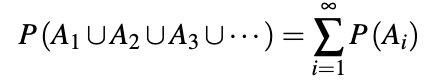

For any event $A, P(A) + P (A′) = 1,$ from which $P(A) = 1 − P (A′)$

When events $A$ and $B$ are mutually exclusive, $P(A ∪ B) = P(A) + P(B)$

For any two events $A$ and $B$, $P(A ∪ B) = P(A) + P(B) − P(A ∩ B)$

In a simply and yet common experiment consisting of N outcomes, it is reasonable to assign equal probabilities to all N simple events. That is, if there are N equally likely outcomes, the probability for each is 1/N. Now consider an event A, with N(A) denoting the number of outcomes contained in A and we have

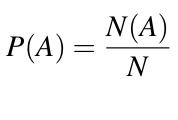


In [ ]:
# Sample space with all possible outcomes
sample_space = {'Heads', 'Tails'}  # Example: Tossing a fair coin

# Defining events
event_A = {'Heads'}  # Simple event (exactly one outcome)
event_B = {'Heads', 'Tails'}  # Compound event (more than one outcome)

# Probability function for a fair coin
def probability(event, sample_space):
    return len(event) / len(sample_space)

# Axioms
P_A = probability(event_A, sample_space)
P_B = probability(event_B, sample_space)

# Output the probabilities
print(f"Probability of Heads: P(A) = {P_A}")
print(f"Probability of Heads or Tails: P(B) = {P_B}")

# Axiom 1: 0 ≤ P(A) ≤ 1
assert 0 <= P_A <= 1, "Probability should be between 0 and 1"
print("Axiom 1: 0 ≤ P(A) ≤ 1 is satisfied")

# Axiom 2: P(S) = 1
P_S = probability(sample_space, sample_space)
assert P_S == 1, "Total probability of the sample space should be 1"
print("Axiom 2: P(S) = 1 is satisfied")

# Axiom 3: Additivity for disjoint events
event_C = {'Tails'}  # Another simple event
assert probability(event_A | event_C, sample_space) == P_A + probability(event_C, sample_space)
print("Axiom 3: P(A ∪ C) = P(A) + P(C) for disjoint events is satisfied")

# Probability of complement
P_A_complement = 1 - P_A
assert P_A + P_A_complement == 1, "Sum of probabilities of an event and its complement should be 1"
print("Probability of A and its complement sum to 1: P(A) + P(A') = 1")


Probability of Heads: P(A) = 0.5
Probability of Heads or Tails: P(B) = 1.0
Axiom 1: 0 ≤ P(A) ≤ 1 is satisfied
Axiom 2: P(S) = 1 is satisfied
Axiom 3: P(A ∪ C) = P(A) + P(C) for disjoint events is satisfied
Probability of A and its complement sum to 1: P(A) + P(A') = 1


## **2.2.2. Conditional Probability**

**Conditional Probability:** Conditional probability is defined as the likelihood of an event or outcome
occurring, based on the occurrence of a previous event or outcome. The con-
ditional probability is expressed as a ratio of unconditional probabilities: The
numerator is the probability of the intersection of the two events, whereas the
denominator is the probability of the conditioning event B. Given that B has
occurred, the relevant sample space is no longer S but consists of outcomes
in B; A has occurred if and only if one of the outcomes in the intersection oc-
curred, so the conditional probability of A given B is proportional to $P(A ∩ B)$.

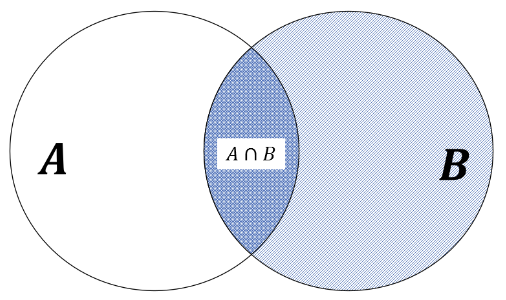

For any two events A and B with $P(B) > 0$, the conditional probability of A given that B has occurred is defined by

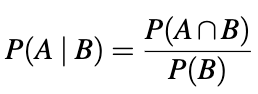

Conditional probability give a rise to the multiplication rule 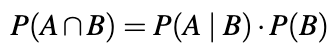

This rule is important because it is often the case that P(A ∩ B) is desired, whereas both $P(B)$ and $P(A | B)$ can be specified from the problem description.


In [ ]:
# Tossing two fair coins, Heads = H, Tails = T
sample_space = {'HH', 'HT', 'TH', 'TT'} # Sample space with all possible outcomes

# Defining events A and B
event_A = {'HH', 'HT'}  # Event A: First coin is a head
event_B = {'HH', 'TH'}  # Event B: At least one head

# Probability of events A and B using the event and space
P_A = probability(event_A, sample_space)
P_B = probability(event_B, sample_space)

print(f"Probability of the first of two coins being heads P(A): {P_A}")
print(f"Probability of one of the two couins being heads P(B): {P_B}")

# Conditional Probability P(A|B) = P(A ∩ B) / P(B)
intersection = event_A & event_B
P_A_given_B = probability(intersection, sample_space) / P_B

print(f"P(A|B): {P_A_given_B}")

# Multiplication Rule P(A ∩ B) = P(A|B) * P(B)
P_A_and_B = P_A_given_B * P_B
print(f"P(A ∩ B): {P_A_and_B}")


Probability of the first of two coins being heads P(A): 0.5
Probability of one of the two couins being heads P(B): 0.5
P(A|B): 0.5
P(A ∩ B): 0.25


## **2.2.3. Discrete Random Variables**

A random variable is understood as a measurable function defined on a prob-
ability space that maps from the sample space to the real numbers. It is
often convenient to associate each outcome of an experiment with a number.
A random variable is described informally as a variable whose values depend
on outcomes of a random phenomenon

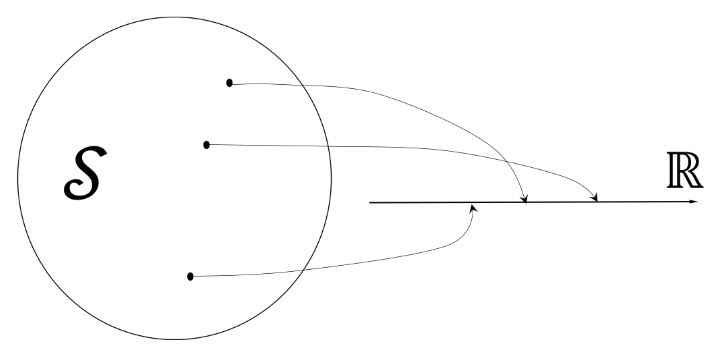

For a given sample space S of some experiment, a random variable is any rule that associates a number with each outcome in S. Mathematically, a random variable is a function whose domain is the sample space and whose range is the set of real numbers.

There are two different types of random variables.

**Discrete Random Variables:** A discrete random variable is a random variable whose possible values either constitute a finite set or else can be listed in an infinite sequence. A random variable is continuous if both of the following apply:

1. Its set of possible values consists all numbers in a single interval on the
number line.
2. $P(X = c) = 0$ for any possible value individual c


In [6]:
# Rolling a fair six-sided die, sample space is all 6 possible rolls
sample_space = {1, 2, 3, 4, 5, 6}

# Random variable X which is the outcome of the roll
X = lambda outcome: outcome

# Probability function for each outcome as a discrete random variable
def discrete_prob(outcome):
    return 1 / len(sample_space) if outcome in sample_space else 0

# Expected value for discrete random variable
# The average (weighted) value after many trials
E_X = sum(X(outcome) * discrete_prob(outcome) for outcome in sample_space)
print(f"Expected value (E[X]): {E_X}")

# Variance for discrete random variable
# Represents the spread of outcomes,
# low meaning small spread, high meaning large spread
Var_X = sum((X(outcome) - E_X)**2 * discrete_prob(outcome) for outcome in sample_space)
print(f"Variance (Var[X]): {Var_X}")

Expected value (E[X]): 3.5
Variance (Var[X]): 2.9166666666666665


## **2.2.4. Continuous Random Variables**

**Continuous Random Variables:** A random variable X is continuous if possible values comprise either a single
interval on the number line or a union of disjoint intervals.

Let X be a continuous random variable. Then a probability distribution or probability density function (pdf) of X is a function $f(x)$ such that for any two numbers $a$ and $b$ with $a ≤ b$,

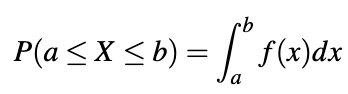

That is, the probability that X takes on a value in the interval [a, b] is the area above this interval and under the graph of the density function, as illustrated below. $f(x)$ must satisfy the following two conditions:
1. $f(x) ≥ 0$ for all x
2. $∫^∞_{−∞} f(x)dx$ = Total area under the entire graph of $f(x) = 1$

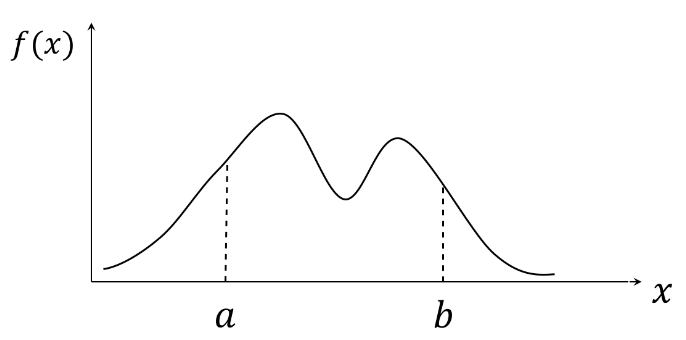

$P(a ≤ X ≤ b) = $ the area under the density curve between a and b

Expected Values and Variances: We define the expected values and variances for continuous random variables as for discrete variables.

The expected or mean value of a continuous random variable $X$ with pdf $f(x)$ is

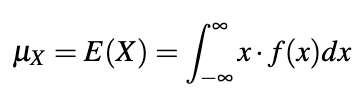

The Normal Distribution: Normal distributions are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.

A continuous random variable X is said to have a normal distribution with parameters $μ$ and $σ$ (or $μ$ and $σ^2$), where $−∞ <μ < ∞$ and $0 < σ$ , if the pdf of $X$ is

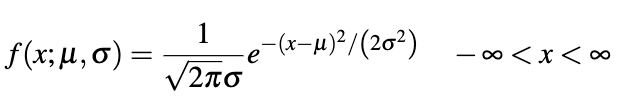


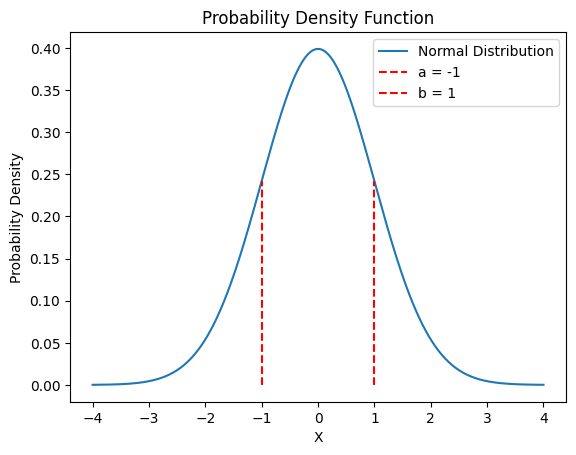

Probability that X is between a and b, P(-1 ≤ X ≤ 1): 0.6826894921370859
Expected value (E[X]): 0
Variance (Var[X]): 1


In [18]:
# Normal distribution
mu, sigma = 0, 1  # mean and standard deviation
X = np.linspace(-4, 4, 1000)
pdf = norm.pdf(X, mu, sigma)
# Get the y-values (pdf values) for a and b
pdf_a = norm.pdf(a, mu, sigma)
pdf_b = norm.pdf(b, mu, sigma)


# Probability that X lies within an interval [a, b]
a, b = -1, 1
P_a_b = norm.cdf(b, mu, sigma) - norm.cdf(a, mu, sigma)

# Plot the probability density function
plt.plot(X, pdf, label='Normal Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Probability Density Function')
# Plot the vertical line segments only under the PDF
plt.plot([a, a], [0, pdf_a], color='r', linestyle='--', label=f'a = {a}')
plt.plot([b, b], [0, pdf_b], color='r', linestyle='--', label=f'b = {b}')
plt.legend()
plt.show()

# Expected value and variance of a normal distribution
E_X = mu
Var_X = sigma**2
print(f"Probability that X is between a and b, P({a} ≤ X ≤ {b}): {P_a_b}")
print(f"Expected value (E[X]): {E_X}")
print(f"Variance (Var[X]): {Var_X}")
